# Data Gathering

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
spam_data = pd.read_csv('spam.csv',encoding='latin-1')
spam_data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [2]:
spam_data = spam_data.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
spam_data= spam_data.rename(columns={"v1":'label', "v2":'text'})
print(spam_data.head())
tags = spam_data["label"]
texts = spam_data["text"]

  label                                               text
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


# Preparing the Data

In [3]:
spam_data.describe() #statiscal data of spam_data

,label,text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [4]:
spam_data.info() #information about the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [5]:
spam_data.groupby('label').describe().T

label                           ham  \
text count                     4825   
     unique                    4516   
     top     Sorry, I'll call later   
     freq                        30   

label                                                     spam  
text count                                                 747  
     unique                                                653  
     top     Please call our customer service representativ...  
     freq                                                    4

In [6]:
spam_data.isnull().sum() #checking null data inside the dataframe

label    0
text     0
dtype: int64

In [7]:
dp = spam_data[spam_data.duplicated()]  #Finding if their is duplicated or not in the data frame
dp.tail() #showing the last to first row

,label,text
5524,spam,You are awarded a SiPix Digital Camera! call 0...
5535,ham,"I know you are thinkin malaria. But relax, chi..."
5539,ham,Just sleeping..and surfing
5553,ham,Hahaha..use your brain dear
5558,ham,"Sorry, I'll call later"


In [8]:
#Getting the ham and spam msg
hm = spam_data[spam_data.label =='ham'] 
spm =spam_data[spam_data.label=="spam"] 
print(hm,spm)

     label                                               text
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
6      ham  Even my brother is not like to speak with me. ...
...    ...                                                ...
5565   ham                                       Huh y lei...
5568   ham              Will Ì_ b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name

[4825 rows x 2 columns]      label                                               text
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
5     spam  FreeMsg Hey there darling it's been 3 week's n...
8     spam  WINNER!! As a valued network cust

In [9]:
from wordcloud import WordCloud, STOPWORDS #Libraries used to show which most words frequently given
import matplotlib.pyplot as plt #visualization of data
%matplotlib inline 

#Converts seperated words into numpy array
hm1 = " ".join(hm.text.to_numpy().tolist())
spm1 = " ".join(spm.text.to_numpy().tolist())

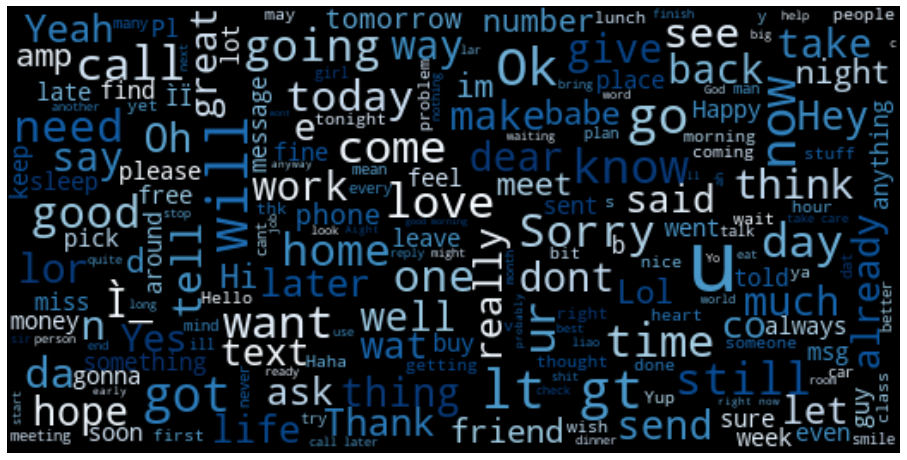

In [10]:
# Wordcloud of ham and spam msg
cloud_hmsg = WordCloud(width =520, height =260, stopwords=STOPWORDS,max_font_size=50, background_color ="black", colormap='Blues').generate(hm1)
cloud_smsg = WordCloud(width =520, height =260, stopwords=STOPWORDS,max_font_size=50, background_color ="black", colormap='Blues').generate(spm1)

#visualization of text of ham and spam
plt.figure(figsize=(16,10))
plt.imshow(cloud_hmsg, interpolation='bilinear')
plt.axis('off') # turn off axis
plt.show()

In [11]:
hamss = hm.sample(n = len(spm), random_state = 44) #used to change the length of ham and spam
spamss = spm
ham_spam = hamss.append(spamss).reset_index(drop=True)

C:\Users\User\AppData\Local\Temp\ipykernel_4388\550475246.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ham_spam = hamss.append(spamss).reset_index(drop=True)


In [12]:
ham_spam['msg_type']= ham_spam['label'].map({'ham': 0, 'spam': 1}) #converting the value of ham and spam into integers 0 and 1
label_data = ham_spam["msg_type"].values

In [13]:
from sklearn.model_selection import train_test_split #training and splitting of data and processing the data by the help of libraries
X_train, X_test, y_train, y_test = train_test_split(ham_spam["text"],label_data, test_size=0.2, random_state=None)

In [14]:
#hyperparameters
max_len = 50 
trunc_type = "post" 
padding_type = "post" 
oov_tok = "<OOV>" 
vocab_size = 500

# Choosing the model

In [15]:
import tensorflow as tf #libraries for fast numerical computing
from tensorflow.keras.preprocessing.text import Tokenizer #Libraries to split the larget body of text into smaller lines

tz = Tokenizer(num_words = vocab_size, char_level=False, oov_token = oov_tok) # split sentences into words
tz.fit_on_texts(X_train)
word_index = tz.word_index
word_index

{'<OOV>': 1,
 'to': 2,
 'you': 3,
 'a': 4,
 'call': 5,
 'i': 6,
 'the': 7,
 'your': 8,
 'u': 9,
 'for': 10,
 'now': 11,
 'is': 12,
 'free': 13,
 '2': 14,
 'have': 15,
 'and': 16,
 'or': 17,
 'in': 18,
 'on': 19,
 'ur': 20,
 'of': 21,
 'txt': 22,
 'from': 23,
 '4': 24,
 'are': 25,
 'with': 26,
 'get': 27,
 'my': 28,
 'me': 29,
 'this': 30,
 'mobile': 31,
 'stop': 32,
 'claim': 33,
 'text': 34,
 'it': 35,
 'reply': 36,
 'just': 37,
 'only': 38,
 'be': 39,
 'no': 40,
 'that': 41,
 'do': 42,
 'www': 43,
 'prize': 44,
 'at': 45,
 'we': 46,
 'will': 47,
 'send': 48,
 'so': 49,
 'can': 50,
 'our': 51,
 'out': 52,
 'not': 53,
 'if': 54,
 't': 55,
 'won': 56,
 'new': 57,
 'up': 58,
 'cash': 59,
 'go': 60,
 'but': 61,
 'nokia': 62,
 'please': 63,
 'week': 64,
 'uk': 65,
 'want': 66,
 'been': 67,
 'win': 68,
 'urgent': 69,
 '1': 70,
 '150p': 71,
 'who': 72,
 "i'm": 73,
 'by': 74,
 'gt': 75,
 'com': 76,
 'msg': 77,
 'all': 78,
 'know': 79,
 'lt': 80,
 '50': 81,
 'tone': 82,
 'what': 83,
 'good': 8

In [16]:
from tensorflow.keras.preprocessing.sequence import pad_sequences #Libraries used to ensure that all sequences have the same lenght
from tensorflow.keras.models import Sequential

train_sequence = tz.texts_to_sequences(X_train)
train_pad = pad_sequences(train_sequence, maxlen=50, padding="post", truncating="post")
test_sequence = tz.texts_to_sequences(X_test)
test_pad = pad_sequences(test_sequence, maxlen=50,padding="post", truncating="post")

# Evaluation 

In [17]:
from tensorflow.keras.layers import Flatten, Dense, Activation, Dropout, Embedding, GlobalAveragePooling1D #Libraries

model = Sequential() #order set 
model.add(Embedding(500, 16, input_length=50)) 
model.add(GlobalAveragePooling1D()) 
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"]) #finalizing the model to used in predicting and fitting
model.fit(train_pad, y_train, epochs=12, validation_data=(test_pad, y_test)) 
model.summary()

Epoch 1/12
38/38 [==============================] - 1s 5ms/step - loss: 0.6850 - accuracy: 0.5941 - val_loss: 0.6741 - val_accuracy: 0.6120
Epoch 2/12
38/38 [==============================] - 0s 1ms/step - loss: 0.6505 - accuracy: 0.6921 - val_loss: 0.6221 - val_accuracy: 0.8161
Epoch 3/12
38/38 [==============================] - 0s 1ms/step - loss: 0.5755 - accuracy: 0.8301 - val_loss: 0.5290 - val_accuracy: 0.8696
Epoch 4/12
38/38 [==============================] - 0s 1ms/step - loss: 0.4693 - accuracy: 0.8762 - val_loss: 0.4258 - val_accuracy: 0.8829
Epoch 5/12
38/38 [==============================] - 0s 1ms/step - loss: 0.3702 - accuracy: 0.8946 - val_loss: 0.3408 - val_accuracy: 0.8829
Epoch 6/12
38/38 [==============================] - 0s 1ms/step - loss: 0.2955 - accuracy: 0.9038 - val_loss: 0.2752 - val_accuracy: 0.9097
Epoch 7/12
38/38 [==============================] - 0s 1ms/step - loss: 0.2432 - accuracy: 0.9180 - val_loss: 0.2270 - val_accuracy: 0.9231
Epoch 8/12
38/38 [==

# Prediction

In [18]:
test_msg = spam_data.iloc[:,1] #calling the data sets
def predict_spam(test_msg): 
    new_seq = tz.texts_to_sequences(test_msg) 
    padded = pad_sequences(new_seq, maxlen=50, padding="post", truncating="post") 
    return (model.predict(padded)) 

pred_f = predict_spam(test_msg) #predicts the object in the datafram
prediction = np.round_(pred_f, decimals = 0, out = None)
prediction


175/175 [==============================] - 0s 460us/step


array([[0.],
       [0.],
       [1.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [19]:
predict_msg = ["You are a winner U have been specially selected 2 receive å£1000 cash or a 4* holiday (flights inc) speak to a live operator 2 claim 0871277810810",
          "Lol they were mad at first but then they woke up and gave in.",
           "staff.science.nus.edu.sg/~phyhcmk/teaching/pc1323"]#random sentences from the spam data


In [20]:
# Defining prediction function
def pred_spam(predict_msg):
    new_seq = tz.texts_to_sequences(predict_msg)
    padded = pad_sequences(new_seq, maxlen =max_len,
                      padding = padding_type,
                      truncating=trunc_type)
    return (model.predict(padded))
pred_spam(predict_msg)

1/1 [==============================] - 0s 12ms/step


array([[0.99073684],
       [0.00941883],
       [0.09839857]], dtype=float32)

The output aboves shows that the 1st sentence have a 99%percent chance of spam while the 2nd and 3rd sentences has a 
0.006 and 0.13 % shows it is not a spam

In [21]:
pred_spam(test_msg) #testing the prediction if the message is spam or not

175/175 [==============================] - 0s 460us/step


array([[0.04706134],
       [0.04262738],
       [0.9943263 ],
       ...,
       [0.01826684],
       [0.06836046],
       [0.02729254]], dtype=float32)

The predictions above illustrated that if the row has a 99 it is a spam and if lower it is not a spam

In [22]:
print(spam_data.head(10))

  label                                               text
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...
5  spam  FreeMsg Hey there darling it's been 3 week's n...
6   ham  Even my brother is not like to speak with me. ...
7   ham  As per your request 'Melle Melle (Oru Minnamin...
8  spam  WINNER!! As a valued network customer you have...
9  spam  Had your mobile 11 months or more? U R entitle...


In [23]:
spam_output=pd.read_csv("output_spam.csv") #Testing the prediction to the output data csv
output=pred_spam(spam_output["text"])
print(output)

1/1 [==============================] - 0s 12ms/step
[[0.08623161]
 [0.09839857]
 [0.03993208]
 [0.11539565]
 [0.01217141]
 [0.04264825]
 [0.3218329 ]
 [0.01815307]
 [0.02003274]
 [0.06371821]
 [0.9912258 ]
 [0.77569216]
 [0.41449955]
 [0.99073684]
 [0.07123938]
 [0.05338438]
 [0.07997426]
 [0.14653492]
 [0.02985971]
 [0.00941883]]
